In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%config InlineBackend.figure_format = 'retina' 

# Bootstrapping Code Demo

## How to Take Bootstrap Samples

Let's look at a toy sample of data to see how resampling works:

In [2]:
toy = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Next, we'll define a function called `resample`. It resamples our original observed dataset.

Bootstrapped samples follow two conditions:
* each bootstrapped sample should be the same size as the original
* each should be sampled uniformly, with replacement

Notice, these two features are implemented in our `resample` function.

In [3]:
def resample(sample):
    bs = []
    for i in range(len(sample)):
        ind = int(np.random.randint(0, len(sample), 1))
        bs.append(sample[ind])
    return bs

Let's create 10 resamples of our original toy dataset, and take a look at them. We've sorted them for the sake of readability.

In [4]:
bootstraps = []
for i in range(10):
    bootstraps.append(sorted(resample(toy)))
bootstraps

[[1, 2, 3, 3, 4, 7, 7, 7, 8, 8],
 [2, 3, 5, 5, 5, 6, 7, 8, 8, 9],
 [1, 3, 4, 4, 4, 5, 7, 7, 8, 9],
 [1, 2, 3, 4, 5, 5, 5, 6, 6, 7],
 [3, 4, 4, 5, 6, 9, 9, 9, 10, 10],
 [1, 2, 2, 3, 4, 5, 7, 8, 9, 10],
 [2, 3, 4, 4, 6, 6, 7, 7, 8, 10],
 [1, 2, 3, 5, 6, 6, 8, 8, 9, 10],
 [1, 2, 4, 5, 6, 7, 7, 8, 8, 8],
 [1, 1, 2, 3, 4, 4, 5, 7, 8, 9]]

Another feature that we observe is that the resampled data follows the distribution of our original data. We'll use a sample of 150 random variables from the F distribution.

In [5]:
f_samp = np.random.f(10, 50, 150)

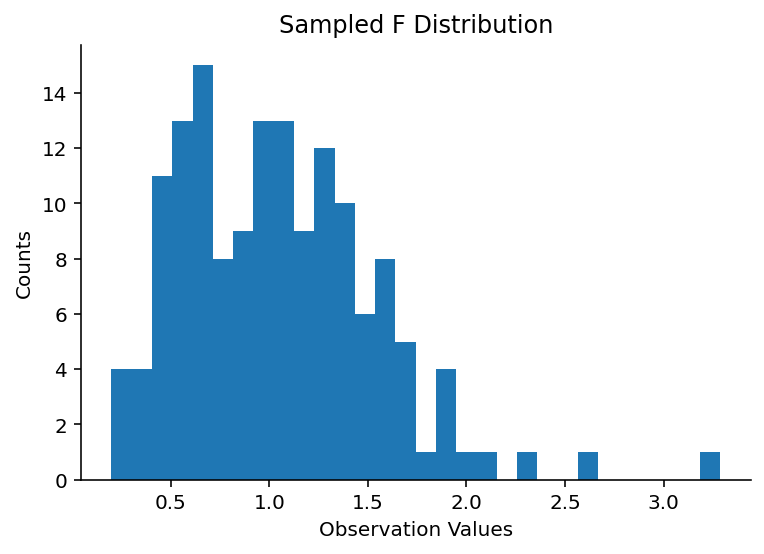

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(f_samp, bins=30)
ax.set_title('Sampled F Distribution')
ax.set_xlabel('Observation Values')
ax.set_ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [7]:
bs_population = resample(f_samp)
for i in range(0, 100):
    bs_population = np.append(bs_population, resample(f_samp))

After aggregating together 100 resamples of the original 150 sample set, we see that the data still follows the relative F distribution shape, as below.

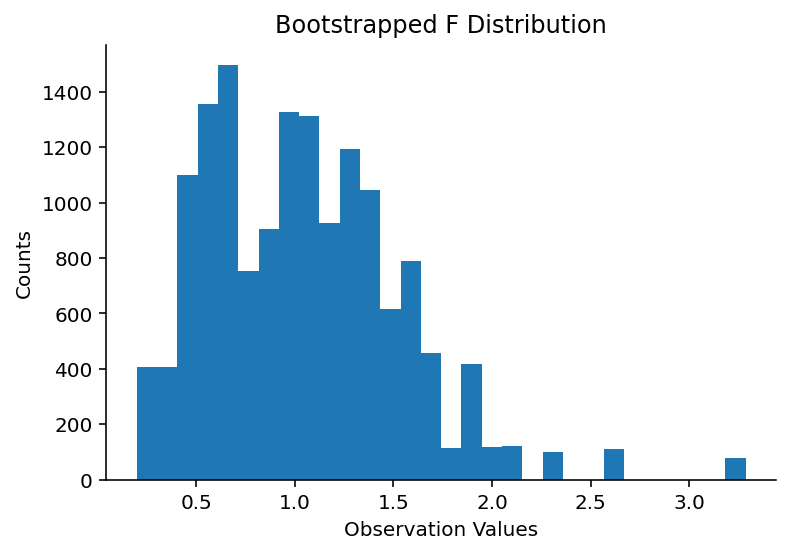

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(bs_population, bins=30)
ax.set_title('Bootstrapped F Distribution')
ax.set_xlabel('Observation Values')
ax.set_ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Using Bootstrapping For Estimating Distribution of Sampling Statistic

### Mean:

Let's start by taking a random sample of 100 values from a normal distribution using numpy.random.normal

In [9]:
norm_samp = np.random.normal(0, 1, 100)

We now define a function which would generate B bootstrapped samples from this sample of 100 values. For each sample, the mean would be calculated and the function returns a list of B means calculated from each of the bootstrapped samples

In [10]:
def bs_means(sample, B):
    means = []
    for i in range(B):
        means.append(np.mean(resample(sample)))
    return means

#### 100 Bootstrapped Samples

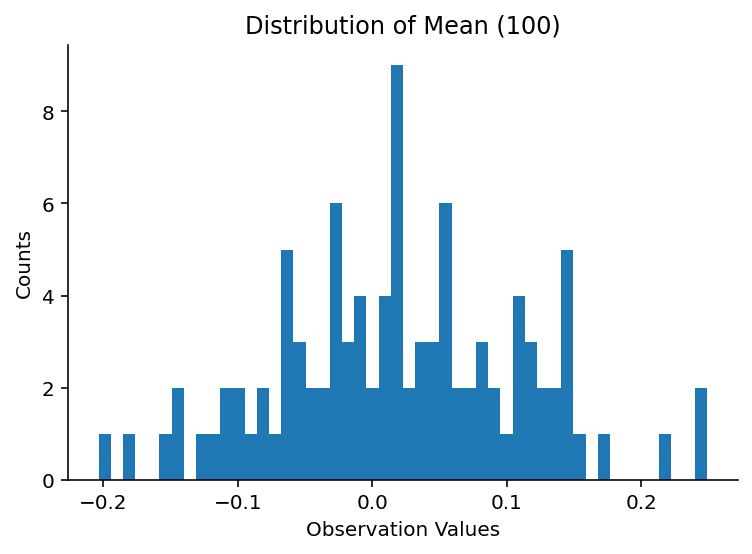

In [11]:
bs = bs_means(norm_samp, 100)
# histogram
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(bs, bins=50)
ax.set_title('Distribution of Mean (100)')
ax.set_xlabel('Observation Values')
ax.set_ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 1,000 Bootstrapped Samples

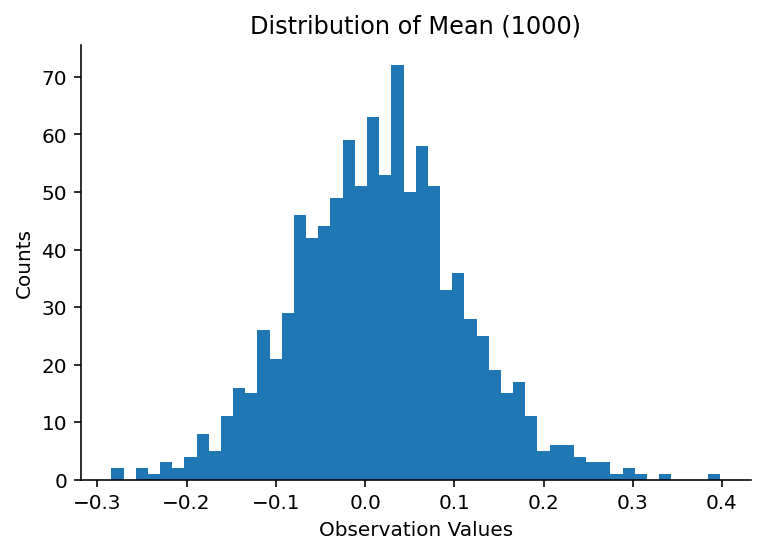

In [12]:
bs = bs_means(norm_samp, 1000)
# histogram
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(bs, bins=50)
ax.set_title('Distribution of Mean (1000)')
ax.set_xlabel('Observation Values')
ax.set_ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 10,000 Bootstrapped Samples

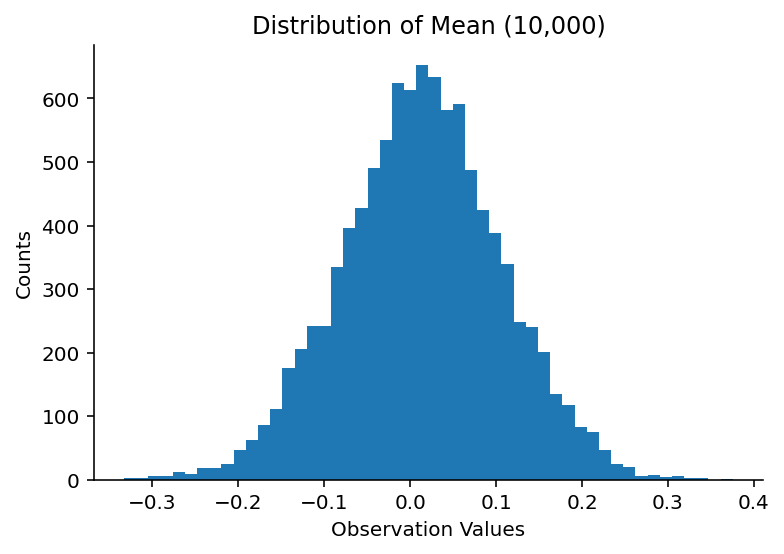

In [13]:
bs = bs_means(norm_samp, 10000)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(bs, bins=50)
ax.set_title('Distribution of Mean (10,000)')
ax.set_xlabel('Observation Values')
ax.set_ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

We see that as we increase the bootstrapped samples the distribution gets smoother and follows a normal distribution. <br> This follows from the Central Limit Theorem.
<br> Think of a statistic like median whose form of distribution is not given by traditional statistical methods, suppose we want to know what would be the distribution of the median of the sample, i.e. the standard deviation and mean of that distribution, bootstrapping would help us in estimating that.

### Median



We define a similar function which would return a list of medians of B bootstrapped samples

In [14]:
def bs_medians(sample, B):
    meds = []
    for i in range(0, B):
        meds.append(np.median(resample(sample)))
    return meds

#### 100 Bootstrapped Samples

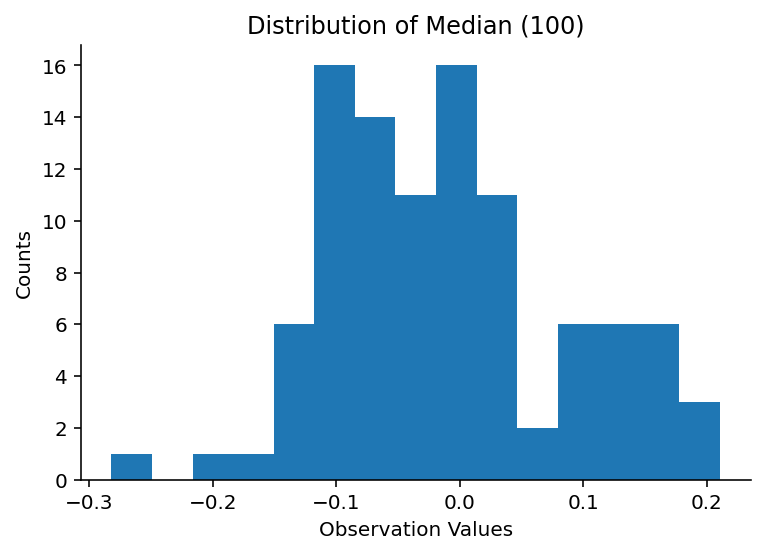

In [15]:
bs = bs_medians(norm_samp, 100)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(bs, bins=15)
ax.set_title('Distribution of Median (100)')
ax.set_xlabel('Observation Values')
ax.set_ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 1,000 Bootstrapped Samples

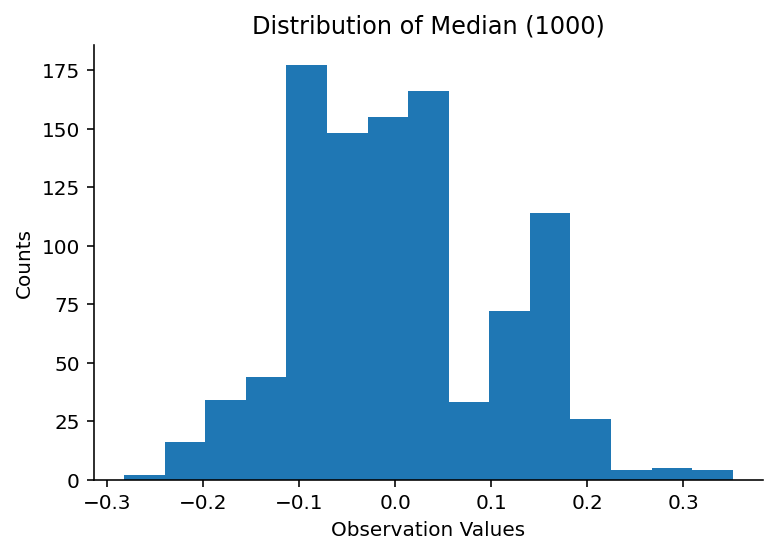

In [16]:
bs = bs_medians(norm_samp, 1000)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(bs, bins=15)
ax.set_title('Distribution of Median (1000)')
ax.set_xlabel('Observation Values')
ax.set_ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 10,000 Bootstrapped Samples

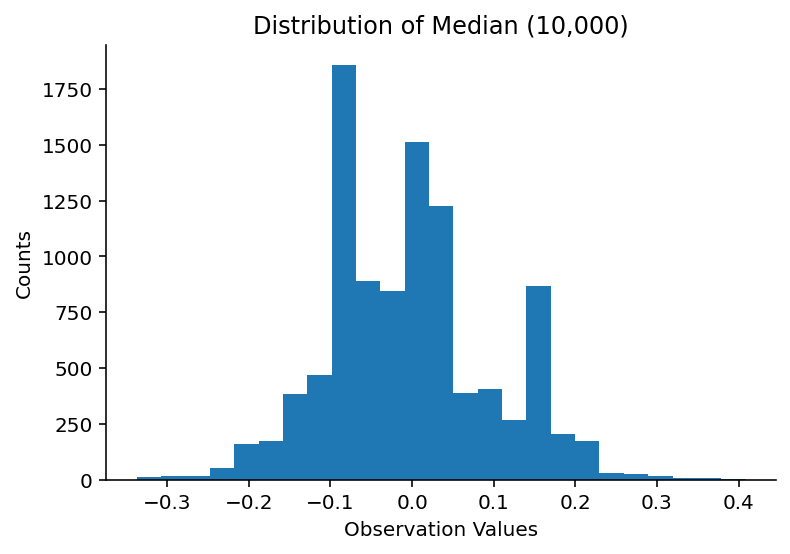

In [17]:
bs = bs_medians(norm_samp, 10000)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(bs, bins=25)
ax.set_title('Distribution of Median (10,000)')
ax.set_xlabel('Observation Values')
ax.set_ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Although we don't see a pretty distribution, we can see that this method enables us to calculate the distribution of any sampling statistic and becomes very helpful especially in cases when we don't have a known idea of distribution from the theorems like CLT.